In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense

In [ ]:
df = pd.read_csv('sample_data/IMDB_Dataset.csv', encoding='ISO-8859-1')

In [ ]:
df.columns = ["review", "sentiment"]

In [ ]:
#df = pd.get_dummies(df, columns=["sentiment"])
df["sentiment"]=pd.factorize(df["sentiment"])[0].astype(int)

In [ ]:
y=df["sentiment"]
y

0        0
1        0
2        0
3        1
4        0
        ..
49995    0
49996    1
49997    1
49998    1
49999    1
Name: sentiment, Length: 50000, dtype: int64

In [ ]:
df["review"]

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [ ]:
columns=df.columns
columns

Index(['review', 'sentiment'], dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
df_train,df_test,y_train,y_test=train_test_split(df["review"],y,test_size=0.20,random_state=42)
print('DF Train Shape: ',df_train.shape)
print('DF Test Shape: ',df_test.shape)
print('Y Train Shape: ',y_train.shape)
print('Y Test Shape: ',y_test.shape)

DF Train Shape:  (40000,)
DF Test Shape:  (10000,)
Y Train Shape:  (40000,)
Y Test Shape:  (10000,)


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
max_words=10000
tokenizer=Tokenizer(max_words)
tokenizer.fit_on_texts(df_train)
sequence_train=tokenizer.texts_to_sequences(df_train)
sequence_test=tokenizer.texts_to_sequences(df_test)

In [ ]:
word2vec=tokenizer.word_index
V=len(word2vec)
print('Dataset has %s number of independent tokens' %V)

Dataset has 112284 number of independent tokens


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
df_train=pad_sequences(sequence_train)
df_train.shape

(40000, 2210)

In [ ]:
T=df_train.shape[1]
df_test=pad_sequences(sequence_test,maxlen=T)
df_test.shape

(10000, 2210)

In [ ]:
from tensorflow.keras.layers import Input,Conv1D,MaxPooling1D,Dense,GlobalMaxPooling1D,Embedding
from tensorflow.keras.models import Model
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [ ]:
'''
D=20
i=Input((T,))
x=Embedding(V+1,D)(i)
x=Conv1D(32,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(64,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(128,3,activation='relu')(x)
x=GlobalMaxPooling1D()(x)
x=Dense(2,activation='softmax')(x)
model=Model(i,x)
model.summary()
'''
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

D = 20
T = 2210
V = 105601

# Define the model architecture
i = Input((T,))
x = Embedding(V + 1, D)(i)
x = Conv1D(64, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Dropout(0.3)(x)
x = Conv1D(128, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = GlobalMaxPooling1D()(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(2, activation='softmax')(x)
model = Model(i, x)
model.summary()

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(patience=3)  # Stop training if the validation loss does not improve for 3 consecutive epochs

# Train the model with early stopping
history = model.fit(df_train, y_train, validation_data=(df_test, y_test), epochs=50, batch_size=128, callbacks=[early_stopping])
y_pred = model.predict(df_test)
print(y_pred)

import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred



Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 2210)]            0         
                                                                 
 embedding_4 (Embedding)     (None, 2210, 20)          2112040   
                                                                 
 conv1d_12 (Conv1D)          (None, 2208, 64)          3904      
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 736, 64)          0         
 1D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 736, 64)           0         
                                                                 
 conv1d_13 (Conv1D)          (None, 734, 128)          24704     
                                                           

array([1, 0, 1, ..., 0, 1, 0])

In [ ]:
from tensorflow.keras.optimizers.legacy import Adam

In [ ]:
df.info

<bound method DataFrame.info of                                                   review  sentiment
0      One of the other reviewers has mentioned that ...          0
1      A wonderful little production. <br /><br />The...          0
2      I thought this was a wonderful way to spend ti...          0
3      Basically there's a family where a little boy ...          1
4      Petter Mattei's "Love in the Time of Money" is...          0
...                                                  ...        ...
49995  I thought this movie did a down right good job...          0
49996  Bad plot, bad dialogue, bad acting, idiotic di...          1
49997  I am a Catholic taught in parochial elementary...          1
49998  I'm going to have to disagree with the previou...          1
49999  No one expects the Star Trek movies to be high...          1

[50000 rows x 2 columns]>

In [ ]:
y_pred=model.predict(df_test)
y_pred

313/313 [==============================] - 13s 40ms/step


array([[1.0459329e-02, 9.8954064e-01],
       [9.6891493e-01, 3.1085124e-02],
       [1.9538279e-03, 9.9804610e-01],
       ...,
       [7.5177151e-01, 2.4822836e-01],
       [5.9407616e-01, 4.0592393e-01],
       [9.9936050e-01, 6.3955405e-04]], dtype=float32)

In [ ]:
import numpy as np
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87      5039
           1       0.85      0.91      0.88      4961

    accuracy                           0.87     10000
   macro avg       0.88      0.88      0.87     10000
weighted avg       0.88      0.87      0.87     10000

0.8748


In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns

Text(50.722222222222214, 0.5, 'Predicted')

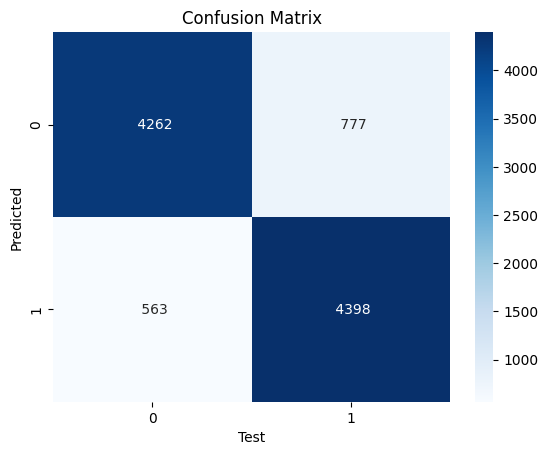

In [ ]:
cm=confusion_matrix(y_test,y_pred)
ax=sns.heatmap(cm,annot=True,cmap='Blues',fmt=' ')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Test')
ax.set_ylabel('Predicted')